<h1><u>Main Part Of The Code</u> </h1>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
plt.style.use('ggplot')
%matplotlib inline

<h2><u> Read The DataFrame </u></h2>

In [4]:
import chardet
import pandas as pd

with open('test.csv' , 'rb') as f:
    result= chardet.detect(f.read())
data  = pd.read_csv('test.csv' , encoding=result['encoding'])

In [5]:
data.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18


In [7]:
data['textID'].values[0] , data.shape

('f87dea47db', (3534, 9))

<h2> Basic Operation using <u>nltk</u> library </h2>
<h3> nltk -> Natural LAnguage ToolKit

In [8]:
token = data['text'][50]
print(token)

Is watching acoustic performances! & In the mood for a good 'FRIENDS' episode! I miss that show


In [9]:
c1 = nltk.wordpunct_tokenize(token)
c1[:6]

['Is', 'watching', 'acoustic', 'performances', '!', '&']

<h3><u>Using Sentiment Analysis We can Determine whether the Given Sentence having Positive , nagative or neutal value.</u> </h3> 

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [12]:
sia.polarity_scores("I am bad guy")

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [13]:
sia.polarity_scores("This is the worst Thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

<h3><u> Value form the our dataset </u></h3>

In [14]:
sia.polarity_scores(token)

{'neg': 0.094, 'neu': 0.702, 'pos': 0.204, 'compound': 0.4374}

<h2><u>Now That Process Apply for the Whole Dataset And Determine the positive , nagative and m neutral value</u> </h2>

In [16]:
data.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18


In [17]:
res={} # Dictionary for the store the pos. , neg. , neu. values
l1=[] # For storeing the Text part of the our Dataset
for row in range(len(data)):
    text = data['text'][row]
    myid = data['textID'][row]
    res[myid]  = sia.polarity_scores(text)
    l1.append(text)

<h3><u>Using Dictionary Create the New DataFrame</u> </h3>

In [19]:
vad = pd.DataFrame(res).T   # .T flip every thing vertically 
vad.head(3)

,neg,neu,pos,compound
f87dea47db,0.000,1.000,0.00,0.0000
96d74cb729,0.000,0.670,0.33,0.7501
eee518ae67,0.382,0.618,0.00,-0.7345


In [21]:
vad['Text'] = l1 # Add the new column into the data set
vad.to_csv('prediction_Data.csv') # create the new csv file for the new dataset

<h2> plot the Graph for the Values </h2>

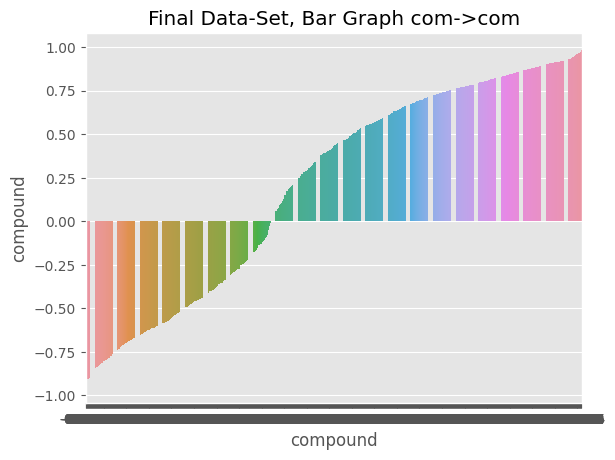

In [22]:
ax = sns.barplot(data=vad , x = "compound" , y = 'compound')
ax.set_title('Final Data-Set, Bar Graph com->com')
plt.show()

<h3>Graph : Positive , negative , nuetral </h3>

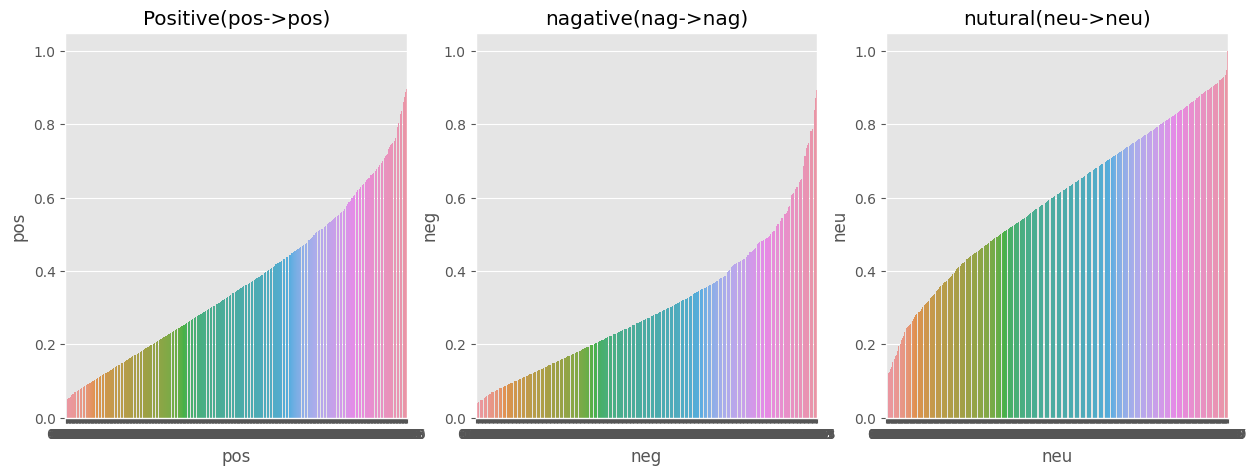

In [24]:
fig , axs  = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vad , x = "pos" , y='pos' , ax = axs[0])
sns.barplot(data=vad , x = "neg" , y='neg' , ax = axs[1])
sns.barplot(data=vad , x = "neu" , y='neu' , ax = axs[2])
axs[0].set_title('Positive(pos->pos)' )
axs[1].set_title('nagative(nag->nag)')
axs[2].set_title('nutural(neu->neu)')
plt.show()

<h2>Method 2 :  </h2>
<h3> Name : roberta-base-sentiment

In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
model_data =f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_data)
model = AutoModelForSequenceClassification.from_pretrained(model_data)

In [27]:
#old example run and set the positive , nagative and nuetral value 

print(token)
sia.polarity_scores(token)

Is watching acoustic performances! & In the mood for a good 'FRIENDS' episode! I miss that show


{'neg': 0.094, 'neu': 0.702, 'pos': 0.204, 'compound': 0.4374}

<h2> Run the sentimental-analysis for single value </h2>


In [28]:
# for the old value snetimental analysis.

encoded_text = tokenizer(data['text'][10] , return_tensors='pt')
output = model(**encoded_text)

# deatch use for fatching the real value into the Whole Description
score = output[0][0].detach().numpy()

# array to dictionary conversion
score_dect = {
    'roberta_neg' : score[0] , 
    'roberta_neu' : score[1] , 
    'roberta_pos' : score[2] 
}

In [29]:
score_dect

{'roberta_neg': 2.5911822,
 'roberta_neu': -0.30170435,
 'roberta_pos': -2.252996}

<h3> Robert Sentiment analysis run for the whole dataset

In [30]:
r_res = {}
score_dect ={}
for row in range(3534):
    text = data['text'][row]
    myid = data['textID'][row]
    encoded_text = tokenizer(text , return_tensors='pt')
    output = model(**encoded_text)
    
    # deatch use for fatching the real value into the Whole Description
    score = output[0][0].detach().numpy()

    # array to dictionary conversion
    score_dect = {
        'roberta_neg' : score[0] , 
        'roberta_neu' : score[1] , 
        'roberta_pos' : score[2] 
    }
    r_res[myid] = score_dect
    

In [33]:
r_data = pd.DataFrame(r_res).T   # .T flip every thing horizontally 

In [34]:
r_data.to_csv('Roberta_class.csv')

<h2> Now graph plot for the robert-Sentiment analysis

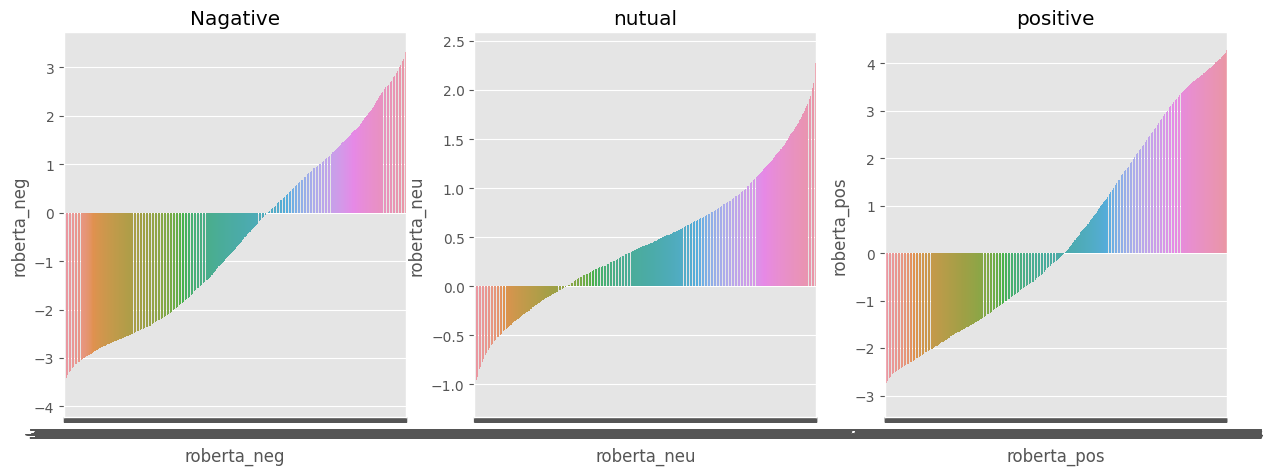

In [35]:
fig , axs  = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=r_data , x = "roberta_neg" , y='roberta_neg' , ax = axs[0])
sns.barplot(data=r_data , x = "roberta_neu" , y='roberta_neu' , ax = axs[1])
sns.barplot(data=r_data , x = "roberta_pos" , y='roberta_pos' , ax = axs[2])
axs[0].set_title('Nagative')
axs[1].set_title('nutual')
axs[2].set_title('positive')
plt.show()

<h2><u> Model-2 DataSet

In [36]:
r_data.head(3)

,roberta_neg,roberta_neu,roberta_pos
f87dea47db,-1.326952,2.000845,-0.651998
96d74cb729,-2.825681,-0.409302,3.905439
eee518ae67,2.397073,0.021418,-2.454489


<h2><u>Model-1 DataSet 

In [37]:
vad.head(3)

,neg,neu,pos,compound,Text
f87dea47db,0.000,1.000,0.00,0.0000,Last session of the day http://twitpic.com/67ezh
96d74cb729,0.000,0.670,0.33,0.7501,Shanghai is also really exciting (precisely -...
eee518ae67,0.382,0.618,0.00,-0.7345,"Recession hit Veronique Branquinho, she has to..."


<h2> Now Merge the Both Data set :

In [38]:
n_pos=[]
n_neu=[]
n_neg=[]
for i in range(len(data)):
    n_neg.append(vad['neg'][i])
    n_neu.append(vad['neu'][i])
    n_pos.append(vad['pos'][i])
c = []
import random
for i in range(len(data)):
    x = random.randint(0,5)
    c.append(x)

<h4><u> Hear Star reprent the ,comment given by the customer and it having range of (1-5)

In [39]:
r_data['N_pos']=n_pos
r_data['N_neu']=n_neu
r_data['N_neg']=n_neg
r_data['TextData']=l1
r_data['Star']=c

In [40]:
r_data.head()

,roberta_neg,roberta_neu,roberta_pos,N_pos,N_neu,N_neg,TextData,Star
f87dea47db,-1.326952,2.000845,-0.651998,0.000,1.000,0.000,Last session of the day http://twitpic.com/67ezh,0
96d74cb729,-2.825681,-0.409302,3.905439,0.330,0.670,0.000,Shanghai is also really exciting (precisely -...,0
eee518ae67,2.397073,0.021418,-2.454489,0.000,0.618,0.382,"Recession hit Veronique Branquinho, she has to...",2
01082688c6,-2.390414,-0.659498,3.621547,0.800,0.200,0.000,happy bday!,0
33987a8ee5,-2.782333,-0.370577,3.891780,0.607,0.393,0.000,http://twitpic.com/4w75p - I like it!!,0


<h1><u>comparison of the Model-1 and Model-2 Positive, negative , neutral value

<h2><li><u>Compare The Whole DataSet </u></li></h2>

In [41]:
r_data.head()

,roberta_neg,roberta_neu,roberta_pos,N_pos,N_neu,N_neg,TextData,Star
f87dea47db,-1.326952,2.000845,-0.651998,0.000,1.000,0.000,Last session of the day http://twitpic.com/67ezh,0
96d74cb729,-2.825681,-0.409302,3.905439,0.330,0.670,0.000,Shanghai is also really exciting (precisely -...,0
eee518ae67,2.397073,0.021418,-2.454489,0.000,0.618,0.382,"Recession hit Veronique Branquinho, she has to...",2
01082688c6,-2.390414,-0.659498,3.621547,0.800,0.200,0.000,happy bday!,0
33987a8ee5,-2.782333,-0.370577,3.891780,0.607,0.393,0.000,http://twitpic.com/4w75p - I like it!!,0


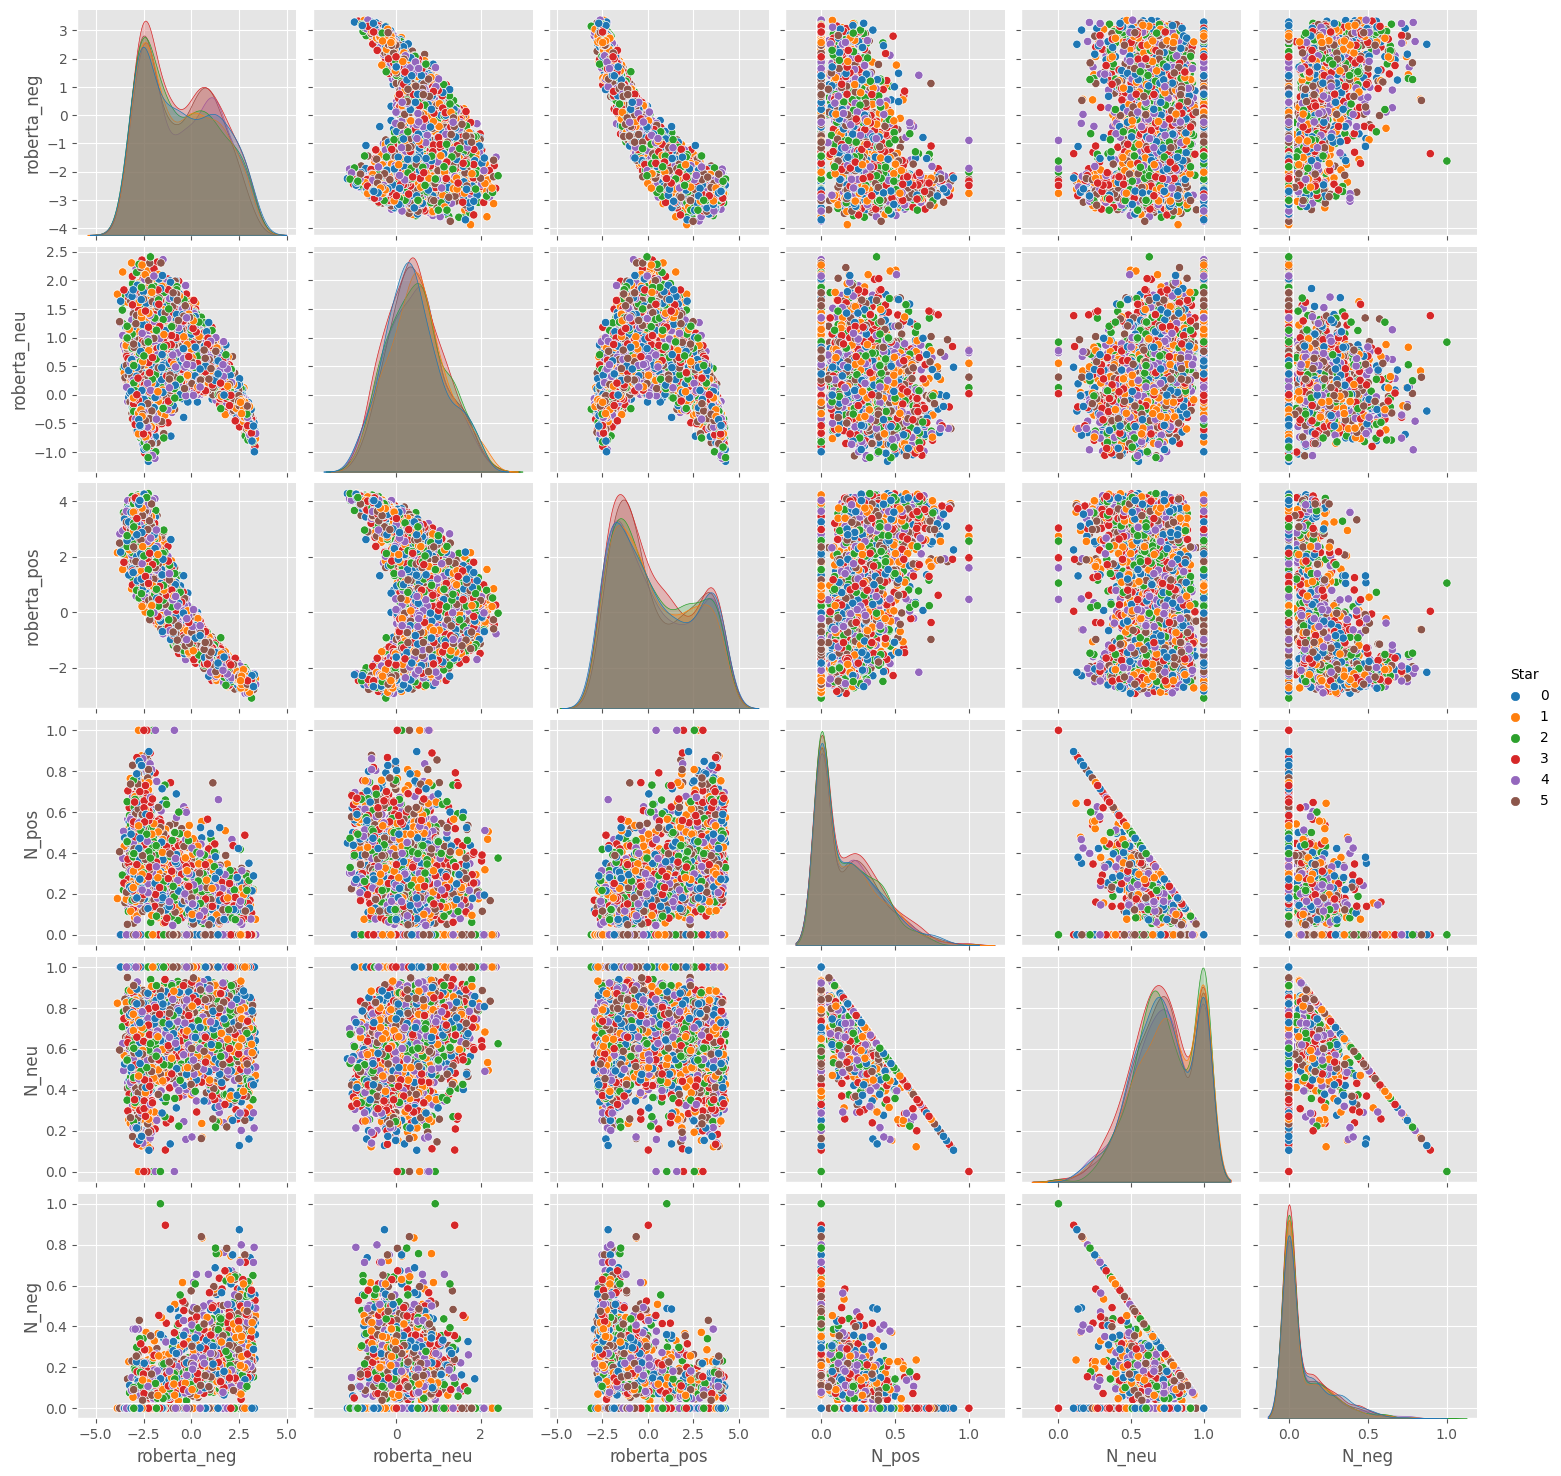

In [42]:
sns.pairplot(data=r_data , vars=[ 'roberta_neg', 'roberta_neu' , 'roberta_pos' , 'N_pos' , 'N_neu' , 'N_neg' ] , hue='Star' ,
            palette='tab10')

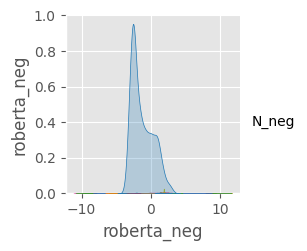

In [43]:
sns.pairplot(data=r_data , vars=[ 'roberta_neg' ] , hue='N_neg' ,
            palette='tab10')

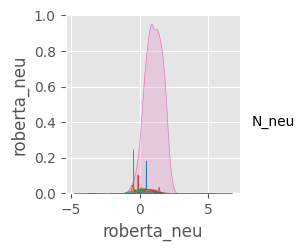

In [44]:
sns.pairplot(data=r_data , vars=[ 'roberta_neu' ] , hue='N_neu' ,
            palette='tab10')

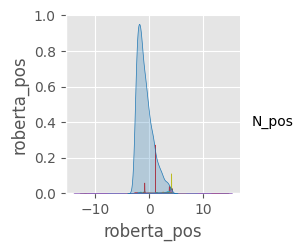

In [45]:
sns.pairplot(data=r_data , vars=[ 'roberta_pos' ] , hue='N_pos' ,
            palette='tab10')

<h3><u>For the Random String Find the sentiment analysis 

In [46]:
import pipeline
from transformers import pipeline

In [47]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [48]:
sent_pipeline("I love You")

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]

In [49]:
def Find_The_Sentiment(text):
    return sent_pipeline(text)

In [51]:
data = str(input())
Find_The_Sentiment(data)

 fg


[{'label': 'NEGATIVE', 'score': 0.8230445981025696}]